In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import math

In [3]:
dist = pd.read_csv('../dist_data.csv', sep=';')

In [4]:
dist_clean = dist[dist['dist'] != "[[], []]"]

In [5]:
x = dist_clean.iloc[:, :-1].values
y = dist_clean.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [7]:
def clean_sample(sample):
    sample_list = sample[0].replace(', [', '; [').split(';')
    sample_x = sample_list[0]
    sample_Px = sample_list[1]

    sample_x_list = []
    sample_Px_list = []
    
    for x in sample_x.split(','):
        sample_x_list.append(x.replace(' ', '').replace('[', '').replace(']', ''))
    for Px in sample_Px.split(','):
        sample_Px_list.append(Px.replace(' ', '').replace('[', '').replace(']', ''))

    dict_sample = {}
    for i in range(len(sample_x_list)):
        dict_sample[sample_x_list[i]] = sample_Px_list[i]
    return dict_sample



# def all_keys_dataset1_exist_in_dataset2(dataset1, dataset2, threshold):
#     count = 0
#     total = len(dataset1.keys())
#     for key in dataset1.keys():
#         if dataset2.get(key) is None:
#             pass
#         else:
#             count += 1

#     if (count/total) * 100 >= float(threshold):
#         #print(count, (count/total) * 100, float(threshold))
#         return True
#     else:
#         return False


def preprocess_distros(distro1, distro2):
    label_distance = []
    for i, sample_x_test in enumerate(distro1):
        print(i)
        label_pre_distro = []
        for j, sample_x_train in enumerate(distro2):
            #distro1_with_all.append(aggregate_distro(clean_sample(sample_x_test), clean_sample(sample_x_train)))
            label_pre_distro.append([distro2_label[j], js(aggregate_distro(clean_sample(sample_x_test), clean_sample(sample_x_train)))])
        label_distance.append(label_pre_distro)
    return label_distance


def aggregate_distro(distro1, distro2):
    xPQx_dict={}
    for xd1, Pxd1 in distro1.items():
        if xd1 == "" or Pxd1 == "":
            continue
        Pxd2 = distro2.get(xd1)
        if Pxd2 is None:
            Pxd2 = 0.0
        xPQx_dict.update({xd1:[Pxd1, Pxd2]})
                    
    for xd2, Pxd2 in distro2.items():
        if xd2 == "" or Pxd2 == "":
            continue
        Pxd1 = distro1.get(xd2)
        if Pxd1 is None:
            Pxd1 = 0.0
            xPQx_dict.update({xd2:[0.0, Pxd2]})
    
    return xPQx_dict


def js(dict_distro):
    #dict_distro : {'443': [P443, Q443], '22': [P22, Q22]}
    PMQx_list = []
    for i in dict_distro.values():
        Mx = (float(i[0]) + float(i[1]))/2
        PMQx_list.append([float(i[0]), Mx, float(i[1])])

    PM_list = []
    QM_list = []
    for i in PMQx_list:
        PM_list.append([i[0], i[1]])
        QM_list.append([i[2], i[1]])

    sum1 = kl(PM_list)
    sum2 = kl(QM_list)

    return (sum1 + sum2)/2


def kl(PQx_list):
    sum = 0 
    for i in PQx_list:
        Pi = i[0]
        Qi = i[1]
        if float(Pi) == 0.0:
            sum += 0.0
            continue
        sum += float(Pi) * math.log2(float(Pi) / float(Qi))
        
    return sum

In [8]:
def Predict(label_distance, threshold):
    y_pred = []
    for i in range(len(final_distro)):
        t = pd.DataFrame(label_distance[i], columns=['Label', 'Kl Result'])
        tmp = t[t['Kl Result'] < threshold]
        grouped_df = tmp.groupby(['Label']).size().reset_index(name='Count')
        sorted_df = grouped_df.sort_values(by=['Count'], ascending=False)
        if tmp.values.size == 0:
            y_pred.append(0)
        else:
            y_pred.append(sorted_df.head(1)['Label'].values[0])
    return y_pred

In [9]:
# def diffrence_pred_test(y_pred, y_test):
#     test = []
#     count = 0
#     for i, value1 in enumerate(y_pred):
#         if value1 != y_test[i]:
#             test.append([i, value1, y_test[i]])
#             count+=1
    
#     return pd.DataFrame(test, columns=['index', 'y_pred', 'y_test'])

In [10]:
# def other_percent_similarity():
#     final_result = []
#     for i in range(1, 101): # one or zero
#         final_result.append(calculate_distance(js, i))
#         print(i,end="  ")
#     return final_result

In [11]:
# label_distance = []
# for dis in final_distro:
#     label_pre_distro = []
#     for j, dis2 in enumerate(dis):
#         label_pre_distro.append([distro2_label[j], js(dis2)])
#     label_distance.append(label_pre_distro)

In [12]:
distro1 = x_test
distro1_label = y_test
distro2 = x_train
distro2_label = y_train

final_distro = preprocess_distros(distro1, distro2)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

prediction = {}
for i in np.arange(1, 0, -0.005):
    #print(i)
    y_pred = Predict(final_distro, i)
    res1 = accuracy_score(y_test,y_pred)
    res2 = f1_score(y_test, y_pred, average="weighted")
    res3 = f1_score(y_test, y_pred, average="micro")
    res4 = f1_score(y_test, y_pred, average="macro")
    prediction[round(i,2)] = [res1, res2, res3, res4]


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame.from_dict(prediction, orient='index', columns=['Accuracy', 'F1_weighted', 'F1_micro', 'F1_macro'])
data
#print(data['Accuracy'])
#sns.histplot(data=data['Accuracy'], x='Accuracy', kde=True, stat='count')
#sns.histplot(data=data, x='Accuracy', kde=True, stat='')

#sns.barplot(x=data['Accuracy'].index, y=data['Accuracy'].values)
#sns.histplot( x=data['Accuracy'].index, y=data['Accuracy'].values,kde=True)

,Accuracy,F1_weighted,F1_micro,F1_macro
1.00,0.499368,0.392054,0.499368,0.251253
0.99,0.502528,0.397732,0.502528,0.258936
0.98,0.518963,0.423883,0.518963,0.278203
0.97,0.530973,0.443005,0.530973,0.289323
0.96,0.616308,0.543800,0.616308,0.342407
...,...,...,...,...
0.04,0.631479,0.642178,0.631479,0.390730
0.03,0.633375,0.644447,0.633375,0.383172
0.02,0.657396,0.664785,0.657396,0.469466
0.01,0.678255,0.679420,0.678255,0.486352


Max Accuracy is: 0.8185840707964602 and threshold is: 0.72
Max F1_weighted is: 0.8087430271918196 and threshold is: 0.48
Max F1_micro is: 0.8185840707964602 and threshold is: 0.72
Max F1_macro is: 0.5480203942316876 and threshold is: 0.48


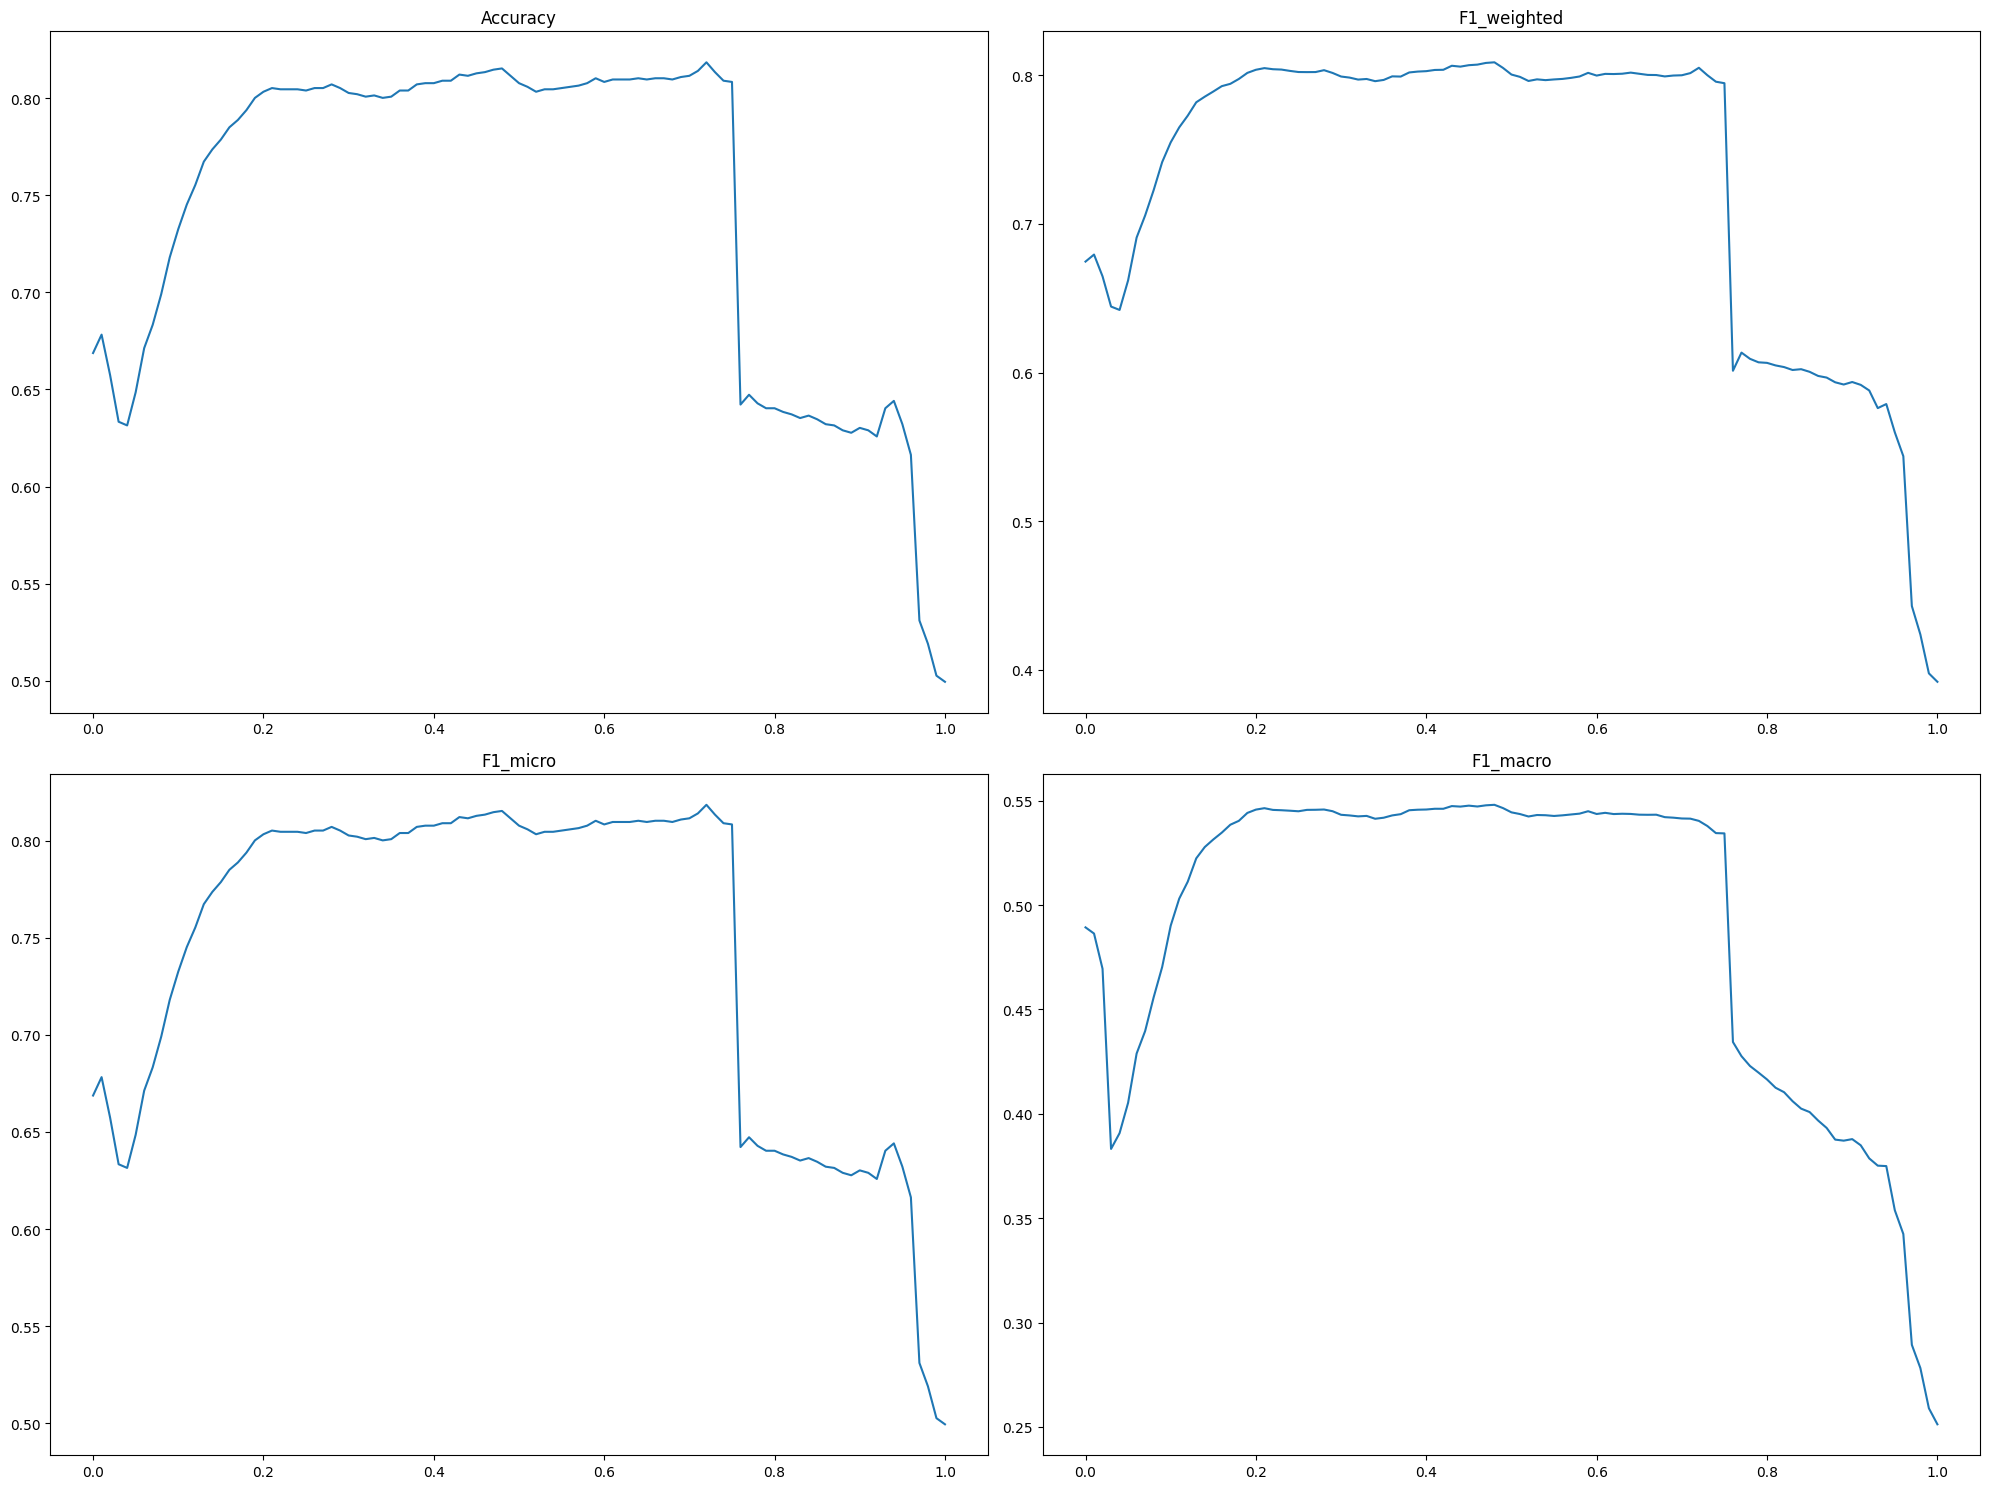

In [34]:
fig, axx = plt.subplots(2, 2, figsize=(20,15))

axx[0, 0].set_title('Accuracy')
sns.lineplot(y=data['Accuracy'].values, x=data.index, ax=axx[0, 0])
print(f"Max Accuracy is: {data['Accuracy'].max()} and threshold is: {data[data['Accuracy'] == data['Accuracy'].max()].index[0]}")



axx[0, 1].set_title('F1_weighted')
sns.lineplot(y=data['F1_weighted'].values, x=data.index, ax=axx[0, 1])
print(f"Max F1_weighted is: {data['F1_weighted'].max()} and threshold is: {data[data['F1_weighted'] == data['F1_weighted'].max()].index[0]}")

axx[1, 0].set_title('F1_micro')
sns.lineplot(y=data['F1_micro'].values, x=data.index, ax=axx[1, 0])
print(f"Max F1_micro is: {data['F1_micro'].max()} and threshold is: {data[data['F1_micro'] == data['F1_micro'].max()].index[0]}")

axx[1, 1].set_title('F1_macro')
sns.lineplot(y=data['F1_macro'].values, x=data.index, ax=axx[1, 1])
print(f"Max F1_macro is: {data['F1_macro'].max()} and threshold is: {data[data['F1_macro'] == data['F1_macro'].max()].index[0]}")

plt.tight_layout()